In [16]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    #fit()Î©îÏÑúÎìúÎäî ÏïÑÎ¨¥Í≤ÉÎèÑ ÌïôÏäµÌïòÏßÄ ÏïäÏùå.
    def fit(self, X, y=None):
        pass
    #predict() Î©îÏÑúÎìúÎäî Îã®ÏàúÌûà Sex ÌîºÏ≤òÍ∞Ä 1Ïù¥Î©¥ 0, Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ 1Î°ú ÏòàÏ∏°Ìï®.
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1

        return pred

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏóê Î∂àÌïÑÏöîÌïú ÌîºÏ≤ò Ï†úÍ±∞ 
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

#Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏàòÌñâ
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
    
#ÏïûÏóêÏÑú ÏÑ§Ï†ïÌïú Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ìò∏Ï∂ú
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df
    
#ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Ïû¨Î°úÎî©, Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ, ÌïôÏäµ Îç∞Ïù¥ÌÑ∞/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†. 
titanic_df = pd.read_csv(r'C:\Users\chois\Downloads\titanic\titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=0)

#ÏúÑÏóêÏÑú ÏÉùÏÑ±Ìïú Dummy ClassifierÎ•º Ïù¥Ïö©Ìï¥ ÌïôÏäµ/ÏòàÏ∏°/ÌèâÍ∞Ä ÏàòÌñâ.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy ClassifierÏùò Ï†ïÌôïÎèÑÎäî: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy ClassifierÏùò Ï†ïÌôïÎèÑÎäî: 0.7877


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15692\1690000210.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15692\1690000210.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    #ÏûÖÎ†•Í∞íÏúºÎ°ú Îì§Ïñ¥Ïò§Îäî X Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïùò ÌÅ¨Í∏∞ÎßåÌÅº Î™®Îëê 0Í∞íÏúºÎ°ú ÎßåÎì§Ïñ¥ÏÑú Î∞òÌôò
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

#ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò ÎÇ¥Ïû• Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïù∏ load_digits()Î•º Ïù¥Ïö©Ìï¥ MNIST Îç∞Ïù¥ÌÑ∞ Î°úÎî©
digits =load_digits()

#digits Î≤àÌò∏Í∞Ä 7Î≤àÏù¥Î©¥ trueÍ≥† Ïù¥Î•º astype(int)Î°ú 1Î°ú Î≥ÄÌôò, 7Î≤àÏù¥ ÏïÑÎãàÎ©¥ falseÏù¥Í≥† 0ÏúºÎ°ú Î≥ÄÌôò. 
y = (digits.target ==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [19]:
#Î∂àÍ∑†ÌòïÌïú Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ÎèÑ ÌôïÏù∏.
print('Î†àÏù¥Î∏î ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÌÅ¨Í∏∞:', y_test.shape)
print('ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Î†àÏù¥Î∏î 0Í≥º 1Ïùò Î∂ÑÌè¨ÎèÑ')
print(pd.Series(y_test).value_counts())

#Dummy ClassifierÎ°ú ÌïôÏäµ/ÏòàÏ∏°/Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('Î™®Îì† ÏòàÏ∏°ÏùÑ 0ÏúºÎ°ú ÌïòÏó¨ÎèÑ Ï†ïÌôïÎèÑÎäî:{:.3f}'.format(accuracy_score(y_test, fakepred)))

Î†àÏù¥Î∏î ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÌÅ¨Í∏∞: (450,)
ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Î†àÏù¥Î∏î 0Í≥º 1Ïùò Î∂ÑÌè¨ÎèÑ
0    405
1     45
Name: count, dtype: int64
Î™®Îì† ÏòàÏ∏°ÏùÑ 0ÏúºÎ°ú ÌïòÏó¨ÎèÑ Ï†ïÌôïÎèÑÎäî:0.900


In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

03 Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®

Ï†ïÌôïÎèÑÎßåÏúºÎ°úÎäî Î™®Îç∏ Ïã†Î¢∞ÎèÑÍ∞Ä Îñ®Ïñ¥Ïßà Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê 

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}'.format(accuracy, precision, recall))

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Ïû¨Î°úÎî©, Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ, ÌïôÏäµ Îç∞Ïù¥ÌÑ∞/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†.
titanic_df = pd.read_csv(r'C:\Users\chois\Downloads\titanic\titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.20, random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

Ïò§Ï∞® ÌñâÎ†¨
[[108  10]
 [ 14  47]]
Ï†ïÌôïÎèÑ: 0.8659, Ï†ïÎ∞ÄÎèÑ: 0.8246, Ïû¨ÌòÑÏú®: 0.7705


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15692\1690000210.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15692\1690000210.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [23]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() Í≤∞Í≥º Shape : {0}'.format(pred_proba.shape))
print('pred_proba arrayÏóêÏÑú Ïïû 3Í∞úÎßå ÏÉòÌîåÎ°ú Ï∂îÏ∂ú \n:', pred_proba[:3])

#ÏòàÏ∏° ÌôïÎ•† arrayÏôÄ ÏòàÏ∏° Í≤∞Í¥èÍ∞í arrayÎ•º Î≥ë„ÖéÏïï(concatenate)Ìï¥ ÏòàÏ∏° ÌôïÎ•†Í≥º Í≤∞Í¥èÍ∞íÏùÑ ÌïúÎààÏóê ÌôïÏù∏
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('Îëê Í∞úÏùò class Ï§ëÏóêÏÑú ÎçîÌÅ∞ ÌôïÎ•†ÏùÑ ÌÅ¥ÎûòÏä§ Í∞íÏúºÎ°ú ÏòàÏ∏° \n', pred_proba_result[:3])

pred_proba() Í≤∞Í≥º Shape : (179, 2)
pred_proba arrayÏóêÏÑú Ïïû 3Í∞úÎßå ÏÉòÌîåÎ°ú Ï∂îÏ∂ú 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
Îëê Í∞úÏùò class Ï§ëÏóêÏÑú ÎçîÌÅ∞ ÌôïÎ•†ÏùÑ ÌÅ¥ÎûòÏä§ Í∞íÏúºÎ°ú ÏòàÏ∏° 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [24]:
from sklearn.preprocessing import Binarizer

X = [[1, -1 ,2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# XÏùò Í∞úÎ≥Ñ ÏõêÏÜåÎì§Ïù¥ thresholdÍ∞íÎ≥¥Îã§ Í∞ôÍ±∞ÎÇò ÏûëÏúºÎ©¥ 0ÏùÑ, ÌÅ¨Î©¥ 1ÏùÑ Î∞òÌôò
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [25]:
from sklearn.preprocessing import Binarizer

#BinarizerÏùò threshold ÏÑ§Ï†ïÍ∞í. Î∂ÑÎ•ò Í≤∞Ï†ï ÏûÑÍ≥óÍ∞íÏûÑ.
custom_threshold=0.5

#predict_proba() Î∞òÌôòÍ∞íÏùò ÎëêÎ≤àÏß∏ ÏπºÎüº. Ï¶â positive ÌÅ¥ÎûòÏä§ ÏπºÎüº ÌïòÎÇòÎßå Ï∂îÏ∂úÌï¥ BinarizerÎ•º Ï†ÅÏö©
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

Ïò§Ï∞® ÌñâÎ†¨
[[108  10]
 [ 14  47]]
Ï†ïÌôïÎèÑ: 0.8659, Ï†ïÎ∞ÄÎèÑ: 0.8246, Ïû¨ÌòÑÏú®: 0.7705


In [26]:
#BinarizerÏùò threshold ÏÑ§Ï†ïÍ∞íÏùÑ 0.4Î°ú ÏÑ§Ï†ï. Ï¶â Î∂ÑÎ•ò Í≤∞Ï†ï ÏûÑÍ≥óÍ∞íÏùÑ 0.5ÏóêÏÑú 0.4Î°ú ÎÇÆÏ∂§
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

Ïò§Ï∞® ÌñâÎ†¨
[[97 21]
 [11 50]]
Ï†ïÌôïÎèÑ: 0.8212, Ï†ïÎ∞ÄÎèÑ: 0.7042, Ïû¨ÌòÑÏú®: 0.8197


In [27]:
#ÌÖåÏä§Ìä∏Î•º ÏàòÌñâÌï† Î™®Îì† ÏûÑÍ≥óÍ∞íÏùÑ Î¶¨Ïä§Ìä∏ Í∞ùÏ≤¥Î°ú Ï†ÄÏû•.
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds listÍ∞ùÏ≤¥ ÎÇ¥Ïùò Í∞íÏùÑ Ï∞®Î°ÄÎ°ú iterationÌïòÎ©¥ÏÑú Evaluation ÏàòÌñâ. 
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('ÏûÑÍ≥óÍ∞í:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

ÏûÑÍ≥óÍ∞í: 0.4
Ïò§Ï∞® ÌñâÎ†¨
[[97 21]
 [11 50]]
Ï†ïÌôïÎèÑ: 0.8212, Ï†ïÎ∞ÄÎèÑ: 0.7042, Ïû¨ÌòÑÏú®: 0.8197
ÏûÑÍ≥óÍ∞í: 0.45
Ïò§Ï∞® ÌñâÎ†¨
[[105  13]
 [ 13  48]]
Ï†ïÌôïÎèÑ: 0.8547, Ï†ïÎ∞ÄÎèÑ: 0.7869, Ïû¨ÌòÑÏú®: 0.7869
ÏûÑÍ≥óÍ∞í: 0.5
Ïò§Ï∞® ÌñâÎ†¨
[[108  10]
 [ 14  47]]
Ï†ïÌôïÎèÑ: 0.8659, Ï†ïÎ∞ÄÎèÑ: 0.8246, Ïû¨ÌòÑÏú®: 0.7705
ÏûÑÍ≥óÍ∞í: 0.55
Ïò§Ï∞® ÌñâÎ†¨
[[111   7]
 [ 16  45]]
Ï†ïÌôïÎèÑ: 0.8715, Ï†ïÎ∞ÄÎèÑ: 0.8654, Ïû¨ÌòÑÏú®: 0.7377
ÏûÑÍ≥óÍ∞í: 0.6
Ïò§Ï∞® ÌñâÎ†¨
[[113   5]
 [ 17  44]]
Ï†ïÌôïÎèÑ: 0.8771, Ï†ïÎ∞ÄÎèÑ: 0.8980, Ïû¨ÌòÑÏú®: 0.7213


In [28]:
from sklearn.metrics import precision_recall_curve

#Î†àÏù¥Î∏î Í∞íÏù¥ 1Ïùº ÎïåÏùò ÏòàÏ∏° ÌôïÎ•†ÏùÑ Ï∂îÏ∂ú
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

#Ïã§Ï†úÍ∞í Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ÏôÄ Î†àÏù¥Î∏î Í∞íÏù¥ 1Ïùº ÎïåÏùò ÏòàÏ∏° ÌôïÎ•†ÏùÑ precision_recall_curve Ïù∏ÏûêÎ°ú ÏûÖÎ†•
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('Î∞òÌôòÎêú Î∂ÑÎ•ò Í≤∞Ï†ï ÏûÑÍ≥óÍ∞í ÎπÑÏó¥Ïùò Shape:', thresholds.shape)

#Î∞òÌôòÎêú ÏûÑÍ≥óÍ∞í Î∞∞Ïó¥ Î°úÏö∞Í∞Ä 147Í±¥Ïù¥ÎØÄÎ°ú ÏÉòÌîåÎ°ú 10Í±¥Îßå Ï∂îÏ∂úÌïòÎêò, ÏûÑÍ≥óÍ∞íÏùÑ 15 stepÏúºÎ°ú Ï∂îÏ∂ú.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('ÏÉòÌîå Ï∂îÏ∂úÏùÑ ÏúÑÌïú ÏûÑÍ≥óÍ∞í Î∞∞Ïó¥Ïùò index 10Í∞ú:', thr_index)
print('ÏÉòÌîåÏö© 10Í∞úÏùò ÏûÑÍ≥óÍ∞í:', np.round(thresholds[thr_index], 2))

# 15 step Îã®ÏúÑÎ°ú Ï∂îÏ∂úÎêú ÏûÑÍ≥óÍ∞íÏóê Îî∞Î•∏ Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú® Í∞í
print('ÏÉòÌîå ÏûÑÍ≥óÍ∞íÎ≥Ñ Ï†ïÎ∞ÄÎèÑ:', np.round(precisions[thr_index], 3))
print('ÏÉòÌîå ÏûÑÍ≥óÍ∞íÎ≥Ñ Ïû¨ÌòÑÏú®:', np.round(recalls[thr_index], 3))

Î∞òÌôòÎêú Î∂ÑÎ•ò Í≤∞Ï†ï ÏûÑÍ≥óÍ∞í ÎπÑÏó¥Ïùò Shape: (165,)
ÏÉòÌîå Ï∂îÏ∂úÏùÑ ÏúÑÌïú ÏûÑÍ≥óÍ∞í Î∞∞Ïó¥Ïùò index 10Í∞ú: [  0  15  30  45  60  75  90 105 120 135 150]
ÏÉòÌîåÏö© 10Í∞úÏùò ÏûÑÍ≥óÍ∞í: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
ÏÉòÌîå ÏûÑÍ≥óÍ∞íÎ≥Ñ Ï†ïÎ∞ÄÎèÑ: [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
ÏÉòÌîå ÏûÑÍ≥óÍ∞íÎ≥Ñ Ïû¨ÌòÑÏú®: [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarrayÏôÄ Ïù¥ thresholdÏóê Îî∞Î•∏ Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú® ndarray Ï∂îÏ∂ú.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # XÏ∂ïÏùÑ thresholdÍ∞íÏúºÎ°ú YÏ∂ïÏùÄ Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú® Í∞íÏúºÎ°ú Í∞ÅÍ∞Å Plot ÏàòÌñâ, Ï†ïÎ∞ÄÎèÑÎäî Ï†êÏÑ†ÏúºÎ°ú ÌëúÏãú
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')

    #threshold Í∞í X Ï∂ïÏùÑ ScaleÏùÑ 0.1 Îã®ÏúÑÎ°ú Î≥ÄÍ≤Ω
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    #xÏ∂ï, yÏ∂ï labelÍ≥º legend, Í∑∏Î¶¨Í≥† grid ÏÑ§Ï†ï
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [31]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 Ïä§ÏΩîÏñ¥: {0:.4f}'.format(f1))

F1 Ïä§ÏΩîÏñ¥: 0.7966


In [36]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    #F1 Ïä§ÏΩîÏñ¥ Ï∂îÍ∞Ä
    f1 = f1_score(y_test, pred)
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    #f1 score print Ï∂îÍ∞Ä
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

ÏûÑÍ≥óÍ∞í: 0.4
Ïò§Ï∞® ÌñâÎ†¨
[[97 21]
 [11 50]]
Ï†ïÌôïÎèÑ: 0.8212, Ï†ïÎ∞ÄÎèÑ: 0.7042, Ïû¨ÌòÑÏú®: 0.8197, F1:0.7576
ÏûÑÍ≥óÍ∞í: 0.45
Ïò§Ï∞® ÌñâÎ†¨
[[105  13]
 [ 13  48]]
Ï†ïÌôïÎèÑ: 0.8547, Ï†ïÎ∞ÄÎèÑ: 0.7869, Ïû¨ÌòÑÏú®: 0.7869, F1:0.7869
ÏûÑÍ≥óÍ∞í: 0.5
Ïò§Ï∞® ÌñâÎ†¨
[[108  10]
 [ 14  47]]
Ï†ïÌôïÎèÑ: 0.8659, Ï†ïÎ∞ÄÎèÑ: 0.8246, Ïû¨ÌòÑÏú®: 0.7705, F1:0.7966
ÏûÑÍ≥óÍ∞í: 0.55
Ïò§Ï∞® ÌñâÎ†¨
[[111   7]
 [ 16  45]]
Ï†ïÌôïÎèÑ: 0.8715, Ï†ïÎ∞ÄÎèÑ: 0.8654, Ïû¨ÌòÑÏú®: 0.7377, F1:0.7965
ÏûÑÍ≥óÍ∞í: 0.6
Ïò§Ï∞® ÌñâÎ†¨
[[113   5]
 [ 17  44]]
Ï†ïÌôïÎèÑ: 0.8771, Ï†ïÎ∞ÄÎèÑ: 0.8980, Ïû¨ÌòÑÏú®: 0.7213, F1:0.8000


In [38]:
from sklearn.metrics import roc_curve

#Î†àÏù¥Î∏î Í∞íÏù¥ 1ÏùºÎïåÏùò ÏòàÏ∏° ÌôïÎ•†ÏùÑ Ï∂îÏ∂ú
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
#Î∞òÌôòÎêú ÏûÑÍ≥óÍ∞í Î∞∞Ïó¥ÏóêÏÑú ÏÉòÌîåÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂úÌïòÎêò, ÏûÑÍ≥óÍ∞íÏùÑ 5 stepÏúºÎ°ú Ï∂îÏ∂ú.
#thresholds[0]ÏùÄ max(ÏòàÏ∏°ÌôïÎ•†)+1Î°ú ÏûÑÏùò ÏÑ§Ï†ïÎê®. Ïù¥Î•º Ï†úÏô∏ÌïòÍ∏∞ ÏúÑÌï¥ np.arangeÎäî 1Î∂ÄÌÑ∞ ÏãúÏûë
thr_index = np.arange(1, thresholds.shape[0], 5)
print('ÏÉòÌîå Ï∂îÏ∂úÏùÑ ÏúÑÌïú ÏûÑÍ≥óÍ∞í Î∞∞Ïó¥Ïùò index:', thr_index)
print('ÏÉòÌîå indexÎ°ú Ï∂îÏ∂úÌïú ÏûÑÍ≥óÍ∞í:', np.round(thresholds[thr_index], 2))

# 5 step Îã®ÏúÑÎ°ú Ï∂îÏ∂úÎêú ÏûÑÍ≥ÑÍ∞íÏóê Îî∞Î•∏ FPR, TPR Í∞í
print('ÏÉòÌîå ÏûÑÍ≥óÍ∞íÎ≥Ñ FPR:', np.round(fprs[thr_index], 3))
print('ÏÉòÌîå ÏûÑÍ≥óÍ∞íÎ≥Ñ TPR:', np.round(tprs[thr_index], 3))

ÏÉòÌîå Ï∂îÏ∂úÏùÑ ÏúÑÌïú ÏûÑÍ≥óÍ∞í Î∞∞Ïó¥Ïùò index: [ 1  6 11 16 21 26 31 36 41 46]
ÏÉòÌîå indexÎ°ú Ï∂îÏ∂úÌïú ÏûÑÍ≥óÍ∞í: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
ÏÉòÌîå ÏûÑÍ≥óÍ∞íÎ≥Ñ FPR: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
ÏÉòÌîå ÏûÑÍ≥óÍ∞íÎ≥Ñ TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


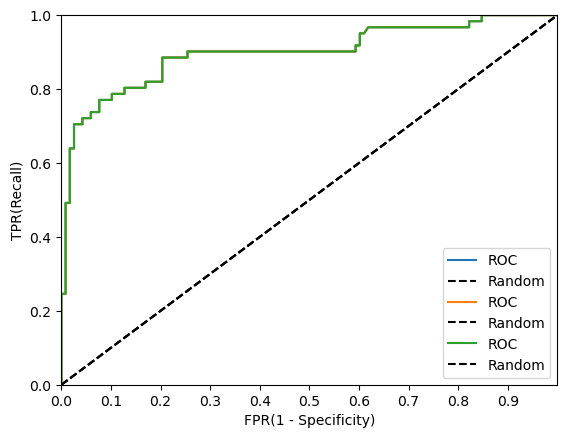

In [42]:
def roc_curve_plot(y_test, pred_proba_c1):
    #ÏûÑÍ≥óÍ∞íÏóê Îî∞Î•∏ FPR, TPR Í∞íÏùÑ Î∞òÌôòÎ∞õÏùå.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #ROC Í≥°ÏÑ†ÏùÑ Í∑∏ÎûòÌîÑ Í≥°ÏÑ†ÏúºÎ°ú Í∑∏Î¶º.
    plt.plot(fprs, tprs, label='ROC')
    #Í∞ÄÏö¥Îç∞ ÎåÄÍ∞ÅÏÑ† ÏßÅÏÑ†ÏùÑÍ∑∏Î¶º.
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    #FPR XÏ∂ïÏùò ScaleÏùÑ 0.1 Îã®ÏúÑÎ°ú Î≥ÄÍ≤Ω, X, YÏ∂ï Î™Ö ÏÑ§Ï†ï Îì±
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Specificity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, pred_proba[:, 1]) 

In [45]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC Í∞í: {0:.4f}'.format(roc_score))

ROC AUC Í∞í: 0.8987


In [51]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall= recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC Ï∂îÍ∞Ä
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    # ROC-AUC print Ï∂îÍ∞Ä
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, \
           F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

ÌîºÎßà Ïù∏ÎîîÏñ∏ ÎãπÎá®Î≥ë ÏòàÏ∏°

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve 
from sklearn.preprocessing import StandardScaler

In [48]:
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv(r'C:\Users\chois\Downloads\archive\diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

In [49]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
#ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ X, Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ yÎ•º Ï∂îÏ∂ú. 
#Îß® ÎÅùÏù¥ Outcome ÏπºÎüºÏúºÎ°ú Î†àÏù¥Î∏î Í∞íÏûÑ. ÏπºÎüº ÏúÑÏπò -1ÏùÑ Ïù¥Ïö©Ìï¥ Ï∂îÏ∂ú
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =156, stratify = y)

#Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ°ú ÌïôÏäµ ,ÏòàÏ∏° Î∞è ÌèâÍ∞Ä ÏàòÌñâ.
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

Ïò§Ï∞® ÌñâÎ†¨
[[87 13]
 [22 32]]
Ï†ïÌôïÎèÑ: 0.7727, Ï†ïÎ∞ÄÎèÑ: 0.7111, Ïû¨ÌòÑÏú®: 0.5926,            F1:0.6465, AUC:0.8083


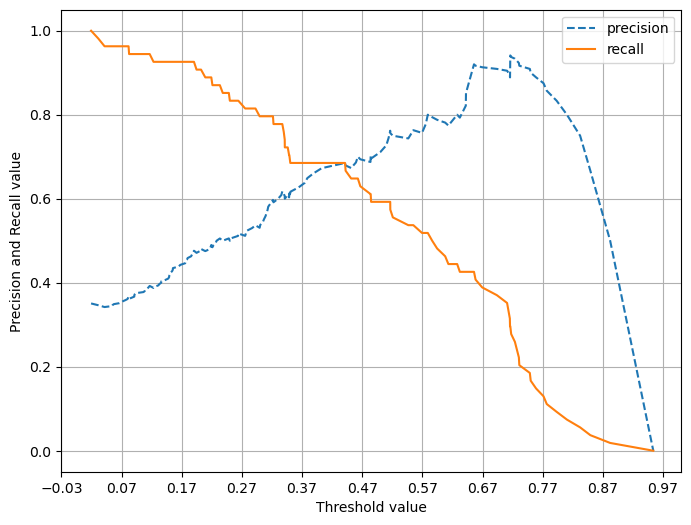

In [53]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [54]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

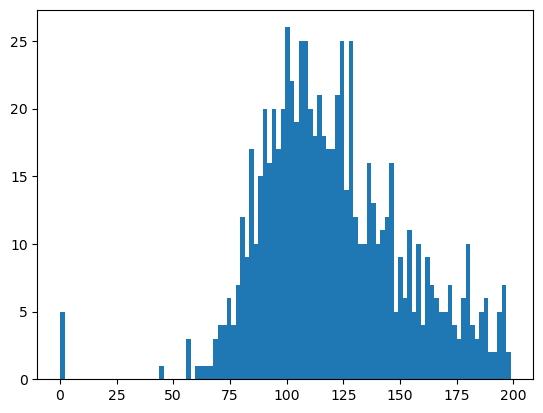

In [55]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

In [64]:
#0Í∞íÏùÑ Í≤ÄÏÇ¨Ìï† ÌîºÏ≤òÎ™Ö Î¶¨Ïä§Ìä∏
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í±¥Ïàò
total_count = diabetes_data['Glucose'].count()

#ÌîºÏ≤òÎ≥ÑÎ°ú Î∞òÎ≥µÌïòÎ©¥ÏÑú Îç∞Ïù¥ÌÑ∞ Í∞íÏù¥ 0Ïù∏ Îç∞Ïù¥ÌÑ∞ Í±¥ÏàòÎ•º Ï∂îÏ∂úÌïòÍ≥†, ÌçºÏÑºÌä∏ Í≥ÑÏÇ∞
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 Í±¥ÏàòÎäî {1}, ÌçºÏÑºÌä∏Îäî {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 Í±¥ÏàòÎäî 5, ÌçºÏÑºÌä∏Îäî 0.65 %
BloodPressure 0 Í±¥ÏàòÎäî 35, ÌçºÏÑºÌä∏Îäî 4.56 %
SkinThickness 0 Í±¥ÏàòÎäî 227, ÌçºÏÑºÌä∏Îäî 29.56 %
Insulin 0 Í±¥ÏàòÎäî 374, ÌçºÏÑºÌä∏Îäî 48.70 %
BMI 0 Í±¥ÏàòÎäî 11, ÌçºÏÑºÌä∏Îäî 1.43 %


In [65]:
#zero_features Î¶¨Ïä§Ìä∏ ÎÇ¥Î∂ÄÏóê Ï†ÄÏû•Îêú Í∞úÎ≥Ñ ÌîºÏ≤òÎì§Ïóê ÎåÄÌï¥ÏÑú 0Í∞íÏùÑ ÌèâÍ∑† Í∞íÏúºÎ°ú ÎåÄÏ≤¥ 
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]-diabetes_data[zero_features].replace(0, mean_zero_features)

Glucose  BloodPressure  SkinThickness    Insulin  BMI
0        0.0            0.0       0.000000 -79.799479  0.0
1        0.0            0.0       0.000000 -79.799479  0.0
2        0.0            0.0     -20.536458 -79.799479  0.0
3        0.0            0.0       0.000000   0.000000  0.0
4        0.0            0.0       0.000000   0.000000  0.0
..       ...            ...            ...        ...  ...
763      0.0            0.0       0.000000   0.000000  0.0
764      0.0            0.0       0.000000 -79.799479  0.0
765      0.0            0.0       0.000000   0.000000  0.0
766      0.0            0.0     -20.536458 -79.799479  0.0
767      0.0            0.0       0.000000 -79.799479  0.0

[768 rows x 5 columns]

In [66]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

#StandardScaler ÌÅ¥ÎûòÏä§Î•º Ïù¥Ïö©Ìï¥ ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê ÏùºÍ¥ÑÏ†ÅÏúºÎ°ú Ïä§ÏºÄÏùºÎßÅ Ï†ÅÏö©
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

#Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ°ú ÌïôÏäµ, ÏòàÏ∏° Î∞è ÌèâÍ∞Ä ÏàòÌñâ.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

Ïò§Ï∞® ÌñâÎ†¨
[[90 10]
 [21 33]]
Ï†ïÌôïÎèÑ: 0.7987, Ï†ïÎ∞ÄÎèÑ: 0.7674, Ïû¨ÌòÑÏú®: 0.6111,            F1:0.6804, AUC:0.8059


In [71]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

ÏûÑÍ≥óÍ∞í: 0.3


InvalidParameterError: The 'y_score' parameter of roc_auc_score must be an array-like. Got None instead.

In [69]:
#ÏûÑÍ≥óÍ∞ì ÏùÑ 0.48Î°ú ÏÑ§Ï†ïÌïú Binarizer ÏÉùÏÑ±
binarizer = Binarizer(threshold = 0.48) 

#ÏúÑÏóêÏÑú Íµ¨Ìïú lr_clfÏùò predict_proba() ÏóêÏ∏° ÌôïÎ•† arrayÏóêÏÑú 1Ïóê Ìï¥ÎãπÌïòÎäî ÏπºÎüºÍ∞íÏùÑ Binarizer Î≥ÄÌôò
pred_th_048 = binarizer.fit_transform(pred_proba[: ,1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

Ïò§Ï∞® ÌñâÎ†¨
[[88 12]
 [21 33]]
Ï†ïÌôïÎèÑ: 0.7857, Ï†ïÎ∞ÄÎèÑ: 0.7333, Ïû¨ÌòÑÏú®: 0.6111,            F1:0.6667, AUC:0.8059


Ïò§Î•òÎÇúÍ±∞ ÏßÄÌîºÌã∞ÌïúÌÖå Î¨ºÏñ¥Î¥Ñ 

In [72]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        # Binarizer Ï†ÅÏö© (1Ï∞®Ïõê Î∞∞Ïó¥ ÏÇ¨Ïö©)
        binarizer = Binarizer(threshold=custom_threshold)
        custom_predict = binarizer.fit_transform(pred_proba_c1.reshape(-1, 1))  # üîÑ reshape ÌïÑÏàò

        # ‚ö† custom_predictÍ∞Ä 2D Î∞∞Ïó¥Ïù¥ÎØÄÎ°ú 1DÎ°ú Î≥ÄÌôò ÌïÑÏöî 
        custom_predict = custom_predict.flatten()

        print('ÏûÑÍ≥óÍ∞í:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)  # ‚úÖ pred_proba_c1ÏùÄ 1D Î∞∞Ïó¥Î°ú Ï†ÑÎã¨

# ÏàòÏ†ïÎêú ÏΩîÎìú Ï†ÅÏö©
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_clf.predict_proba(X_test)[:, 1]  # ‚úÖ 1Ï∞®Ïõê Î∞∞Ïó¥ Ïú†ÏßÄ

get_eval_by_threshold(y_test, pred_proba, thresholds)

ÏûÑÍ≥óÍ∞í: 0.3
Ïò§Ï∞® ÌñâÎ†¨
[[69 31]
 [13 41]]
Ï†ïÌôïÎèÑ: 0.7143, Ï†ïÎ∞ÄÎèÑ: 0.5694, Ïû¨ÌòÑÏú®: 0.7593,            F1:0.6508, AUC:0.8059
ÏûÑÍ≥óÍ∞í: 0.33
Ïò§Ï∞® ÌñâÎ†¨
[[74 26]
 [17 37]]
Ï†ïÌôïÎèÑ: 0.7208, Ï†ïÎ∞ÄÎèÑ: 0.5873, Ïû¨ÌòÑÏú®: 0.6852,            F1:0.6325, AUC:0.8059
ÏûÑÍ≥óÍ∞í: 0.36
Ïò§Ï∞® ÌñâÎ†¨
[[76 24]
 [18 36]]
Ï†ïÌôïÎèÑ: 0.7273, Ï†ïÎ∞ÄÎèÑ: 0.6000, Ïû¨ÌòÑÏú®: 0.6667,            F1:0.6316, AUC:0.8059
ÏûÑÍ≥óÍ∞í: 0.39
Ïò§Ï∞® ÌñâÎ†¨
[[79 21]
 [19 35]]
Ï†ïÌôïÎèÑ: 0.7403, Ï†ïÎ∞ÄÎèÑ: 0.6250, Ïû¨ÌòÑÏú®: 0.6481,            F1:0.6364, AUC:0.8059
ÏûÑÍ≥óÍ∞í: 0.42
Ïò§Ï∞® ÌñâÎ†¨
[[81 19]
 [20 34]]
Ï†ïÌôïÎèÑ: 0.7468, Ï†ïÎ∞ÄÎèÑ: 0.6415, Ïû¨ÌòÑÏú®: 0.6296,            F1:0.6355, AUC:0.8059
ÏûÑÍ≥óÍ∞í: 0.45
Ïò§Ï∞® ÌñâÎ†¨
[[85 15]
 [20 34]]
Ï†ïÌôïÎèÑ: 0.7727, Ï†ïÎ∞ÄÎèÑ: 0.6939, Ïû¨ÌòÑÏú®: 0.6296,            F1:0.6602, AUC:0.8059
ÏûÑÍ≥óÍ∞í: 0.48
Ïò§Ï∞® ÌñâÎ†¨
[[88 12]
 [21 33]]
Ï†ïÌôïÎèÑ: 0.7857, Ï†ïÎ∞ÄÎèÑ: 0.7333, Ïû¨ÌòÑÏú®: 0.6111,            F1:0.6667, AUC:0.8059
ÏûÑÍ≥óÍ∞í: 0.5
Ïò§Ï∞® ÌñâÎ†¨